# Heart Disease Data Set -- Cleveland

In [57]:
# modules we will use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read in the Heart Disease Data Set--Cleveland from UCI online data base
dataset_url='http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
#heart_data_cle=pd.read_csv(dataset_url, dtype={'age':float, 'sex':float, 'cp':float, 'trestbps':float, 'chol':float, 
#                                               'fbs':float, 'restecg':float, 'thalach':float, 'exang':float, 
#                                               'oldpeak':float, 'slope':float, 'ca':float, 'thal':float, 'num':float})
heart_data_cle=pd.read_csv(dataset_url, header=None)
# set seed for reproducibility
np.random.seed(0)

heart_data_cle.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [58]:
heart_data_cle.columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
#heart_data_cle.sample(5)
heart_data_cle.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [59]:
heart_data_cle.shape

(303, 14)

In [60]:
# get the number of missing data points per column
heart_data_cle = heart_data_cle.replace({'?': np.nan})
missing_values_count = heart_data_cle.isnull().sum()
missing_values_count[:]

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [61]:
# get the percentage of missing data points per column
missing_values_percentage = np.divide(heart_data_cle.isnull().sum(), heart_data_cle.count()) * 100
missing_values_percentage[:]

age         0.000000
sex         0.000000
cp          0.000000
trestbps    0.000000
chol        0.000000
fbs         0.000000
restecg     0.000000
thalach     0.000000
exang       0.000000
oldpeak     0.000000
slope       0.000000
ca          1.337793
thal        0.664452
num         0.000000
dtype: float64

In [62]:
# It seems in this dataset, the missing values are a negligible part. Therefore, let's just drop out them. 
heart_data_cle = heart_data_cle.dropna()
heart_data_cle.shape

(297, 14)

In [63]:
# Verify that all the missing data has been removed
missing_values_count_after_removed = heart_data_cle.isnull().sum()
missing_values_count_after_removed[:]

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [64]:
# Now make sure that all data are in type of float
heart_data_cle.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
num           int64
dtype: object

In [49]:
heart_data_cle.loc[:,(heart_data_cle.applymap(type)==str).all(0)]

,ca,thal
0,0.0,6.0
1,3.0,3.0
2,2.0,7.0
3,0.0,3.0
4,0.0,3.0
5,0.0,3.0
6,2.0,3.0
7,0.0,3.0
8,1.0,7.0
9,0.0,7.0


In [65]:
# It seems the 'ca' and 'thal' columns are string values, let's convert them into float
#heart_data_cle.convert_objects(convert_numeric=True)
heart_data_cle['ca'] = heart_data_cle['ca'].convert_objects(convert_numeric=True)
heart_data_cle['thal'] = heart_data_cle['thal'].convert_objects(convert_numeric=True)

C:\Users\Guangxi\Anaconda3\envs\deeplearning35\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Guangxi\Anaconda3\envs\deeplearning35\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.


In [66]:
heart_data_cle.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

In [67]:
# Now let's split the data set into training set and test set
from sklearn.model_selection import train_test_split
X, y = heart_data_cle.iloc[:, 0: -1], heart_data_cle.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,    # 20% of the data is used as testing data
                                                    random_state=0, 
                                                    stratify=y)
#X_train.head()
y_train.head()

262    0
169    0
79     3
200    0
33     0
Name: num, dtype: int64

In [68]:
print("X_train.shape=" + str(X_train.values.shape))
print("X_test.shape=" + str(X_test.values.shape))
print("y_train.shape=" + str(y_train.values.shape))
print("y_test.shape=" + str(y_test.values.shape))

X_train.shape=(237, 13)
X_test.shape=(60, 13)
y_train.shape=(237,)
y_test.shape=(60,)


In [69]:
# Normalization of the dataframe
#from sklearn.preprocessing import MinMaxScaler
#mms = MinMaxScaler()
#X_train_norm = mms.fit_transform(X_train)
#X_test_norm = mms.transform(X_test)

# Standardization of the dataframe
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

Let's try to use PCA to visulize the training data to have a intuition. 
1. Calculate the covariance matrix
2. Find the (eigen value, eigen vector) pairs 
3. Select the first two eigen vectors corresponding to the largest two eigen values to form the projection matrix
4. Transform the initial 14-dimensional input dataset into the 2-dimentional dataset
5. Plot the scatter plot for intuition

In [70]:
# Calculation of covariance matrix
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[3.17596338 1.58240681 1.27434511 0.34825921 0.41029515 0.45775199
 1.09152604 1.0026307  0.59555381 0.71184209 0.7575712  0.84462434
 0.80231492]


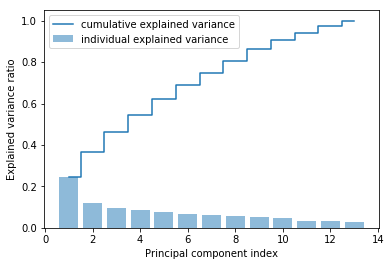

In [71]:
# Visualize the variance_explained_ratios
tot = sum(eigen_vals)
var_exp = [(i/tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp=np.cumsum(var_exp)
plt.bar(range(1,14), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [74]:
# From the figure above we can see the first two principal components combined explains about 40% of the variance in the dataset
# Make a list of the (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)
# Generate the 13*2 dimensional projection matrix with the two largest eigen vectors 
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
w.shape

(13, 2)

In [75]:
X_train_pca = X_train_std.dot(w)
X_train_pca.shape

(237, 2)

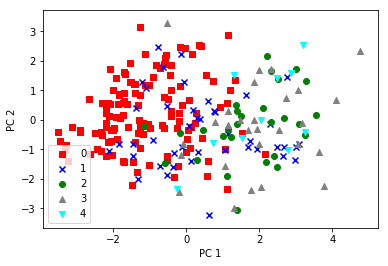

In [76]:
# Let's visualize the data on the 2-dimensional space
colors = ['red', 'blue', 'green', 'gray', 'cyan']
makers = ['s', 'x', 'o', '^', 'v']
for l, c, m in zip(np.unique(y_train), colors, makers): 
    plt.scatter(X_train_pca[y_train==l, 0], 
                X_train_pca[y_train==l, 1], 
                c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

In [77]:
# A function to visualize the decision boundary
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    colors = ['red', 'blue', 'green', 'gray', 'cyan']
    markers = ['s', 'x', 'o', '^', 'v']
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min()-1, X[:, 0].max()+1
    x2_min, x2_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], 
                    y=X[y==cl, 1], 
                    alpha=0.6,
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx],
                    label=cl)                                

In [78]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [108]:
# The data has been preprocessed, now let's first use linear Support Vector Machine to learn and predict this dataset
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=6.0, random_state=0)   # It seesm that when C>6.0, the score is always 0.6
svm.fit(X_train_std, y_train)
#svm.predict(X_test_std)
svm.score(X_test_std, y_test)

0.6

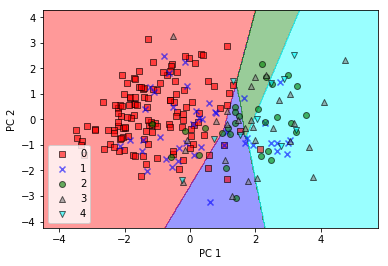

In [109]:
svm.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=svm)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

In [110]:
# Try Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=10.0, random_state=1) # It seems the C value here doesn't really affect the score
lr.fit(X_train_std, y_train)
lr.score(X_test_std, y_test)

0.6166666666666667

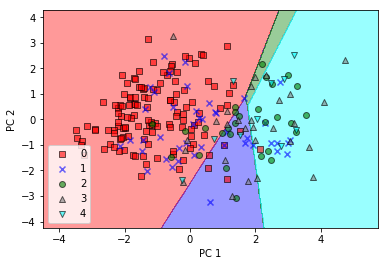

In [111]:
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

In [120]:
# Try the Kernel SVM 
svm_kernel=SVC(kernel='rbf', random_state=0, gamma=0.01, C=5.0)   # It seems gamma = 0.01 is the best, C value doesn't affect that much
svm_kernel.fit(X_train_std, y_train)
#svm_kernel.predict(X_test_std)
svm_kernel.score(X_test_std, y_test)


0.6166666666666667

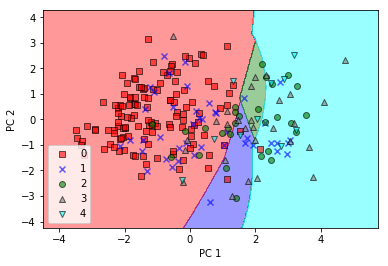

In [121]:
svm_kernel.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=svm_kernel)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

In [139]:
# Try KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4, p=2, metric='minkowski')    # n_neighbors=4 is the best
knn.fit(X_train_std, y_train)
knn.score(X_test_std, y_test)

0.6666666666666666

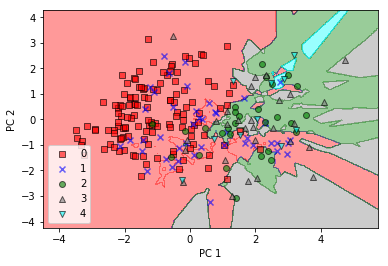

In [140]:
knn.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=knn)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

In [28]:
# Declare hyperparameters to tune
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'kernel': ['rbf'], 
                     'gamma' : [2e0, 2e-1, 2e-2],
                     'C'     : [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 
                     'C'     : [1, 10, 100, 1000]}]
clf = GridSearchCV(SVC(), tuned_parameters, cv=10)  # CV = 10, 10 foldes cross validation


In [29]:
clf.fit(X_train_std, y_train)
clf.score(X_test_std, y_test)

0.55

In [142]:
# Try DNN
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_y = encoder.transform(y_train)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_y)
print(dummy_y)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]]


In [158]:
# define baseline model
# inputs -> [8 hidden nodes] -> [8 hidden nodes] -> 5 outputs
from keras.models import Sequential
from keras.layers import Dense
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=13, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(8, activation='relu'))
    #model.add(Dense(8, activation='relu'))
    #model.add(Dense(8, activation='relu'))
    model.add(Dense(5, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [159]:
from keras.wrappers.scikit_learn import KerasClassifier
#from sklearn.model_selection import KFold
#from sklearn.model_selection import cross_val_score
estimator = KerasClassifier(build_fn=baseline_model, epochs=2000, batch_size=5, verbose=0)

#kfold = KFold(n_splits=10, shuffle=True, random_state=0)
#results = cross_val_score(estimator, X_train_std, dummy_y, cv=kfold)
#print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

estimator.fit(X_train_std, y_train)
#predictions = estimator.predict(X_test)
estimator.score(X_test_std, y_test)

0.6500000109275182

The score corresponding to different number of hidden layers is as follows
Number of hidden layers  |  Hidden units in each layer |       epochs       |        Score
           1                       8                            200                  0.667 
           2                       8                            200                  0.667
           3                       8                            200                  0.600
           4                       8                            200                  0.700
           5                       8                            200                  0.533
           5                       8                            2000                 0.583
           4                       8                            2000                 0.617
           3                       8                            2000                 0.650
                     

In [184]:
X_train_std.shape

(236, 12)